<a href="https://colab.research.google.com/github/lucas-porto/Data_science_bootcamp/blob/master/notebooks/LP_ds_bootcamp_mod_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
#<font color = #944dff>  **Módulo 1 - Python e Pandas para análise de dados reais**
---
---


---
##<font color = #944dff>  **Aula 1**
---

#### <font color = #8533ff> **1.1.1 - Carregando dados e bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.gridspec import GridSpec
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Este estudo irá tratar sobre os dados por local de internação, porém existem duas opções sobre as datas:



*   Data de atendimento: Este dataset contém números que conforme os meses passam, os números dos meses anteriores podem variar, já que não sabemos quanto tempo demora para um paciente ser atendido, quanto tempo leva pós atendimento e liberação do mesmo para que os dados sejam processados e efetuado os pagamentos.
*   Data de processamento: Quando efetivamente os dados foram dados input no sistema.



Os dados referente ao TABNET, optei por salvá-los no drive a fim de não termos que sempre recarregá-los ao iniciar o notebook.

Um ponto importante é o read_csv tem diferentes opções para melhorarmos o tratamento e carregamento dos dados. Como vimos ao importar os dados inicialmente, precisamos alterar algumas opções:


*   encoding: o  formato utilizado para escrita do arquivo, no nosso caso foi o latin1 'ISO-8859-1'
*   sep: o separador conforme o TABNET era ';', porém verificamos que era apenas ','
*   skiprows: tivemos que pular o cabeçalho do arquivo
*   skipfooter: pulamos algumas informações explicativas que eles informam 
*   thousands: mudamos o separador de milhares para '.'
*   decimal: mudamos o separador de decimais para ','
*   engine: foi necessário incluirmos a engine devido a um softwarning do Colab
*   na_values: '-' foi usado apenas na primeira aula, porém devido a forma de tratar os dados nas outras, tive que retirar.



In [2]:
arquivo_aula_1 = '/content/drive/My Drive/Estudos/Data Science/Alura/Bootcamp Data Science/Módulo 1/dados/procedimentos_hospitalares_ano_processamento_2008_2020.csv'
arquivo_aula_2 = '/content/drive/My Drive/Estudos/Data Science/Alura/Bootcamp Data Science/Módulo 1/dados/A160324189_28_143_208.csv'
arquivo_estudo_1 = '/content/drive/My Drive/Estudos/Data Science/Alura/Bootcamp Data Science/Módulo 1/dados/dados_ibge_populacao_estado.csv'


dados = pd.read_csv(arquivo_aula_2, encoding='ISO-8859-1',
                    sep=';', skiprows=3, skipfooter =12, 
                    thousands='.', decimal =',',
                    engine='python')



#necessário formatar a apresentação das casas decimais
pd.options.display.float_format = '{:.2f}'.format

#### <font color = #8533ff>**1.1.2 - Analisando os dados**

In [3]:
#verificando as 5 primeiras linhas
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [4]:
#verificando as 5 últimas linhas
dados.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,103028189.47,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,11958647088.33
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,18126954.44,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2172157981.36
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2036923784.59
25,52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33663853.68,33958341.89,36899367.18,32721458.05,35621496.15,32535396.77,32332573.53,33702293.07,30923462.58,34861711.53,33764503.14,36357757.30,33492211.73,35313884.40,35380148.68,33780632.05,35990491.96,34862475.74,34050646.02,34795831.02,33279088.23,34951022.38,36207403.69,37750841.56,35372150.57,36473617.92,38399592.70,36335534.96,37171427.64,36234132.35,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4657348958.66
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2429933198.76


In [5]:
#verificando as principais informações do dataset
#vemos que não temos apenas números, existe um objeto.

#aqui temos o insight que pode haver NaN
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(157), object(123)
memory usage: 59.2+ KB


In [6]:
#vendo a média dos dados.
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

#### <font color = #8533ff>**1.1.3 - Analisando os dados faltantes**

In [7]:
'''

Este tratamento foi executado inicialmente quando estávamos utilizando os dados com data do procedimento,
naquele caso utilizar o na_values ='-' no import, assim com o tratamento abaixo ficava simples encontrar as colunas com valores nulos.

#Identificando os dados nulos
#criando cliente uma selecao para identificar quais colunas tem valor nulo
selecao_nula = dados.isnull().sum() > 0
#verificando na Series criada quais tem valor nulo
selecao_nula = selecao_nula[selecao_nula == True]
#transformado num data frame
selecao_nula = selecao_nula.to_frame()
selecao_nula = selecao_nula.reset_index().rename(columns = {'index': 'Mês'})
selecao_nula = selecao_nula['Mês']

#Aplicando a selecao numa com os nomes dos index que retirei, podemos ver que a mesma unidade da federação
#tem dados nulos, se olharmos nosso dataset principal, podemos ver que é o Estado do Acre.

dados[selecao_nula]

'''


"\n\nEste tratamento foi executado inicialmente quando estávamos utilizando os dados com data do procedimento,\nnaquele caso utilizar o na_values ='-' no import, assim com o tratamento abaixo ficava simples encontrar as colunas com valores nulos.\n\n#Identificando os dados nulos\n#criando cliente uma selecao para identificar quais colunas tem valor nulo\nselecao_nula = dados.isnull().sum() > 0\n#verificando na Series criada quais tem valor nulo\nselecao_nula = selecao_nula[selecao_nula == True]\n#transformado num data frame\nselecao_nula = selecao_nula.to_frame()\nselecao_nula = selecao_nula.reset_index().rename(columns = {'index': 'Mês'})\nselecao_nula = selecao_nula['Mês']\n\n#Aplicando a selecao numa com os nomes dos index que retirei, podemos ver que a mesma unidade da federação\n#tem dados nulos, se olharmos nosso dataset principal, podemos ver que é o Estado do Acre.\n\ndados[selecao_nula]\n\n"

#### <font color = #8533ff>**1.1.4 - Visualizações iniciais**



In [8]:
dados['2008/Ago']

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42487939.51
19   179898070.22
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21041071.33
26    11548451.89
Name: 2008/Ago, dtype: float64

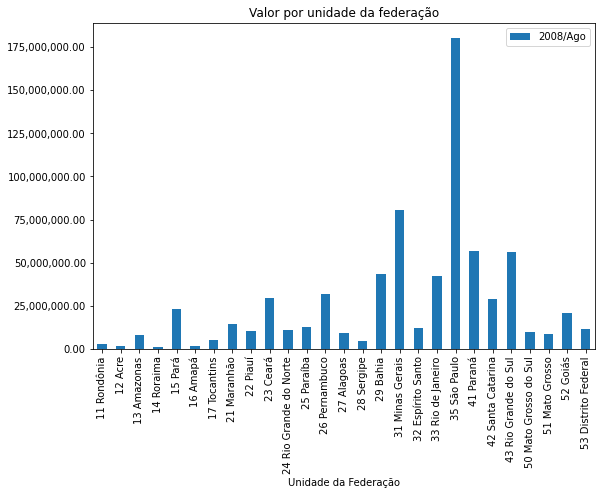

In [9]:
#plotando um gráfico simples como barra
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize =(9,6))

#formatador da legenda do eixo y, colocando o formato do valor
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('Valor por unidade da federação')
plt.show()

### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.** 

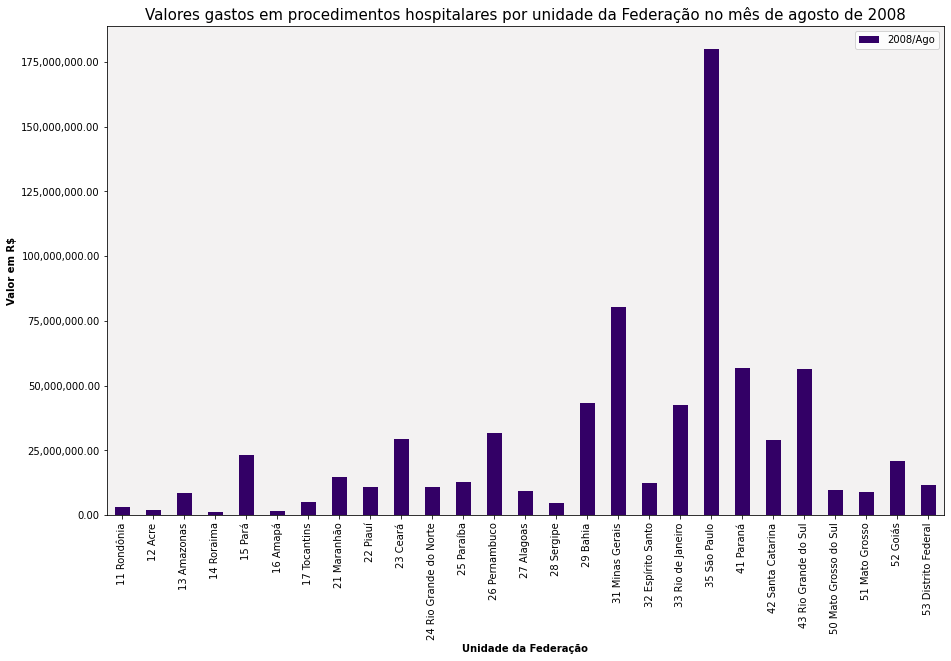

In [10]:
#@title  <font size = 3 >Código do plot
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(15,9), color = '#330066' )


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

#adicionado legendas
ax.set_ylabel('Valor em R$',color='black', fontweight='bold')
ax.set_xlabel('Unidade da Federação',color='black', fontweight='bold')

#adicionando cores nos eixos
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#adicionando cor no fundo
ax.set_facecolor("#f3f2f2")

plt.title('Valores gastos em procedimentos hospitalares por unidade da Federação no mês de agosto de 2008', {'fontsize': 15, 'color': 'black'})
plt.show()

#### <font color = #1f004d> **Desafio 02: Realizar a mesma análise da aula para o mês atual.** 

In [11]:
#selecionando apenas o mês mais recente do dataset e inserido em um dataframe auxiliar
#dados_mes_atual
dados_mes_atual = dados[['Unidade da Federação', '2020/Ago']]


#como vimos anteriormente, o Acre não possui dados do mês de agosto de 2020, iremos zerar o mesmo apenas no dataframe auxiliar para plotarmos o gráfico
dados_mes_atual['2020/Ago'] = dados_mes_atual['2020/Ago'].str.replace('-','0').fillna(0).astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


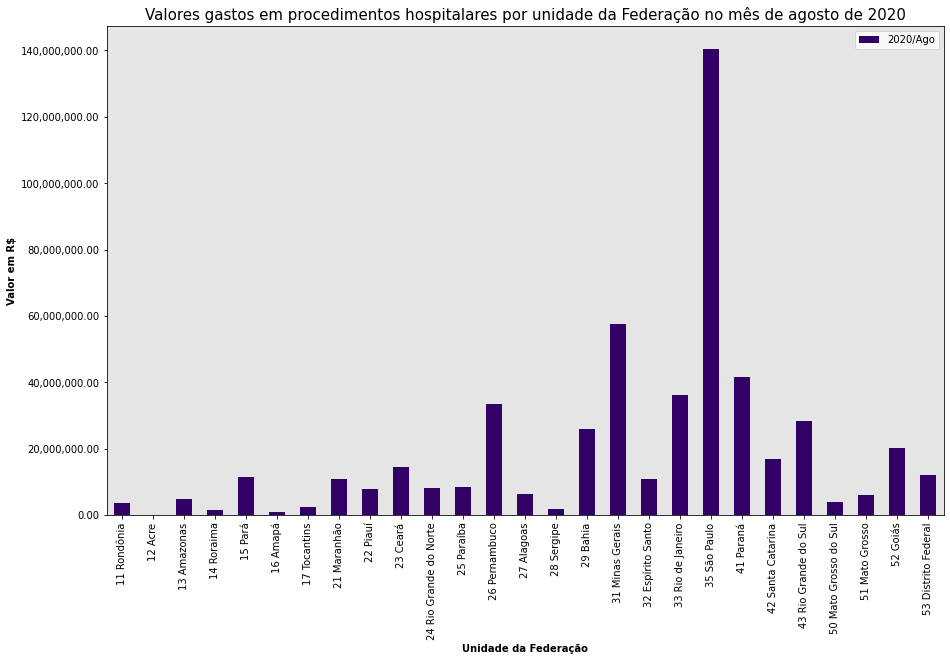

In [12]:
#@title  <font size = 3 >Código do plot
ax = dados_mes_atual.plot(x='Unidade da Federação', y='2020/Ago', kind='bar', figsize=(15,9), color = '#330066' )


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

#adicionado legendas
ax.set_ylabel('Valor em R$',color='black', fontweight='bold')
ax.set_xlabel('Unidade da Federação',color='black', fontweight='bold')

#adicionando cores nos eixos
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#adicionando cor no fundo
ax.set_facecolor("#e6e5e5")

plt.title('Valores gastos em procedimentos hospitalares por unidade da Federação no mês de agosto de 2020', {'fontsize': 15, 'color': 'black'})
plt.show()

#### <font color = #1f004d> **Como seria o comparativo entre Agosto de 2008, 2014 e 2020?** 

In [13]:
#@title  <font size = 3 >Separando dados dos 3 anos
dados_mes_comparativos = dados[['Unidade da Federação','2008/Ago','2014/Ago','2020/Ago']].sort_values(by = '2008/Ago',ascending=True)
#lembrando que temos dados nulos apenas no agosto de 2020 no Acre
dados_mes_comparativos['2020/Ago'] = dados_mes_comparativos['2020/Ago'].str.replace('-','0').fillna(0).astype(float)

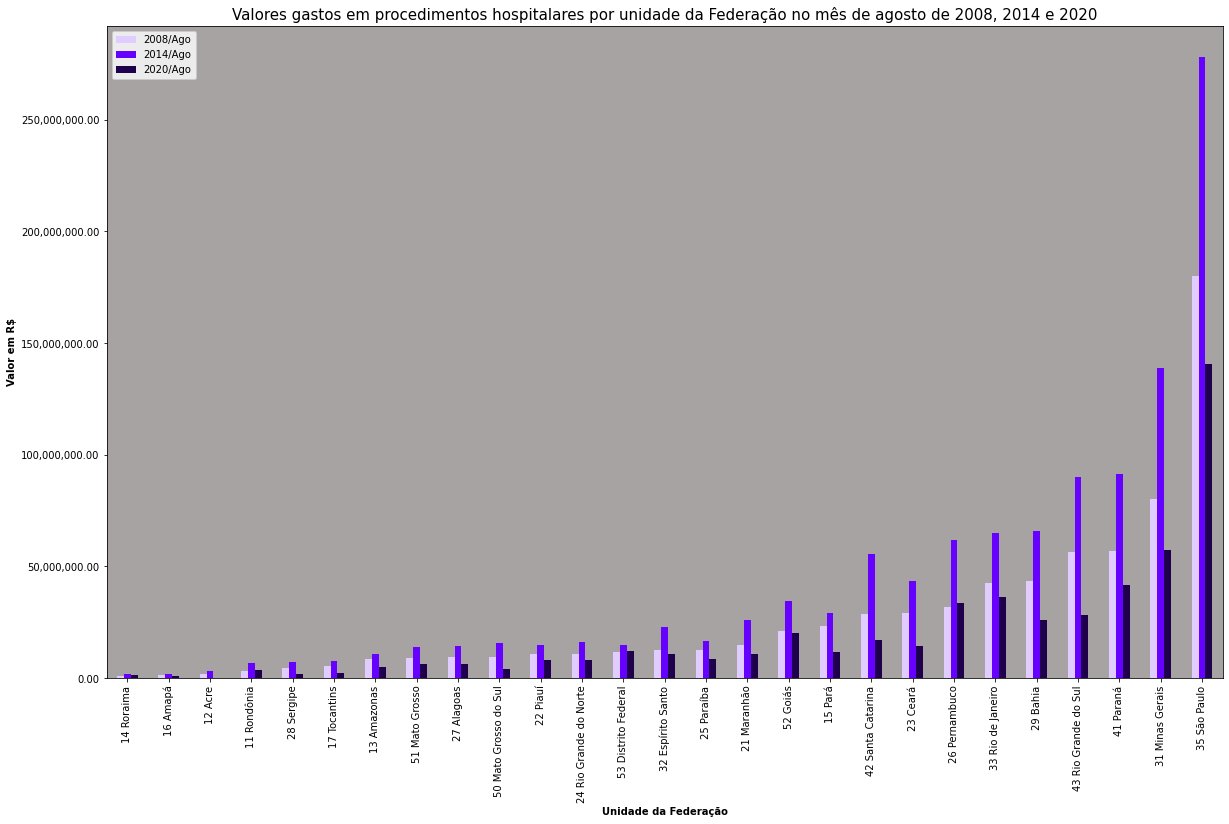

In [14]:
#@title <font size = 3 > Código do plot
ax = dados_mes_comparativos.plot.bar(x='Unidade da Federação',   figsize=(20,12), color=('#e0ccff','#6600ff','#1f004d'))


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

#adicionado legendas
ax.set_ylabel('Valor em R$',color='black', fontweight='bold')
ax.set_xlabel('Unidade da Federação',color='black', fontweight='bold')

#adicionando cores nos eixos
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#adicionando cor no fundo
ax.set_facecolor("#a8a3a3")

plt.title('Valores gastos em procedimentos hospitalares por unidade da Federação no mês de agosto de 2008, 2014 e 2020', {'fontsize': 15, 'color': 'black'})
plt.show()

Esta análise foi executada para os dados de processamento:
Dependendo de como serão nossas análises no futuro, fica já o insight de qual seria o motivo para alguns estados terem um custo quase dobrado em 12 anos e outros não tiveram o mesmo padrão de crescimento?


Com os dados de atendimento temos outra avaliação:
Podemos ver que alguns estados demoram muito mais para processar os números que outros, já que os valores estão em constate subida, se olharmos por exemplo Mato Grosso do Sul, ele estaria gastando menos do que em agosto de 2008, porém sabemos que isso não reflete a realidade e sim, que o sistema de informação do estado tem uma defasagem no processamento da informação, muito provavelmente.

### <font color = #1f004d> **Desafios pós Cafézinho**

#### <font color = #1f004d> **Provocações do Discord - Cafézinho 04/11** 

- Gráficos horizontais
- Gráficos ordenados
- Verificar  as grades principais
- Colocar em MM
- Mobile: fonte 16
- Existe versionamento em mobile no colab?

#### <font color = #1f004d> **Desafio 01: Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.** 

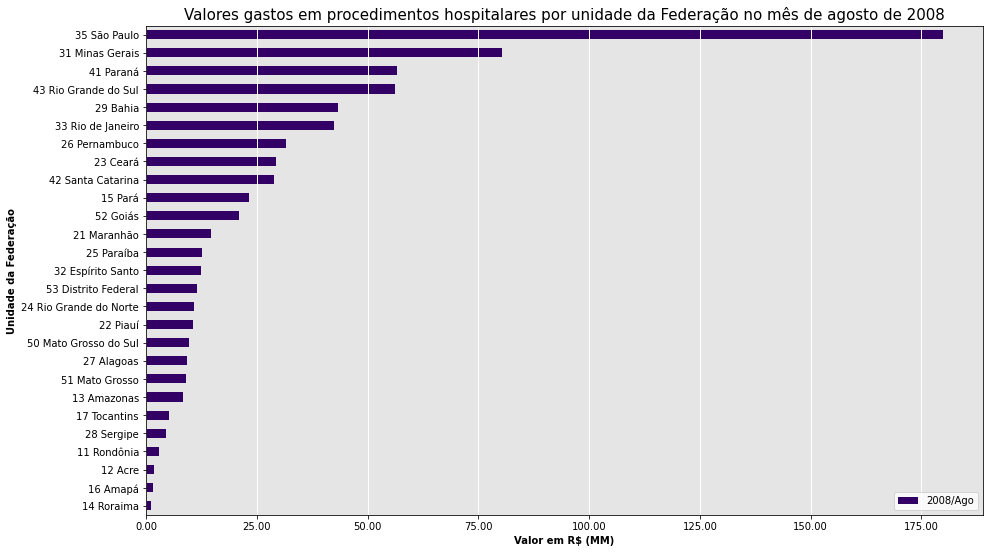

In [15]:


#selecionando dados de agosto de 2008
dados_agosto_2008 = dados[['Unidade da Federação','2008/Ago']].sort_values(by ='2008/Ago')
dados_agosto_2008['2008/Ago'] = dados_agosto_2008['2008/Ago']/1000000

ax = dados_agosto_2008.plot(x='Unidade da Federação', y='2008/Ago', kind='barh', figsize=(15,9), color = '#330066')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

#adicionando as grids intermediarias
#ax.minorticks_on()
#ax.xaxis.grid(which='minor', linestyle ='--', linewidth=1, color = 'w')
ax.xaxis.grid(which='major', linestyle ='-', linewidth=1, color = 'w')

#adicionado legendas
ax.set_xlabel('Valor em R$ (MM)',color='black', fontweight='bold')
ax.set_ylabel('Unidade da Federação',color='black', fontweight='bold')

#adicionando cores nos eixos
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#adicionando cor no fundo
ax.set_facecolor("#e6e5e5")

plt.title('Valores gastos em procedimentos hospitalares por unidade da Federação no mês de agosto de 2008', {'fontsize': 15, 'color': 'black'})
plt.show()

#### <font color = #1f004d> **Desafio 02: Realizar a mesma análise da aula para o mês atual.** 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


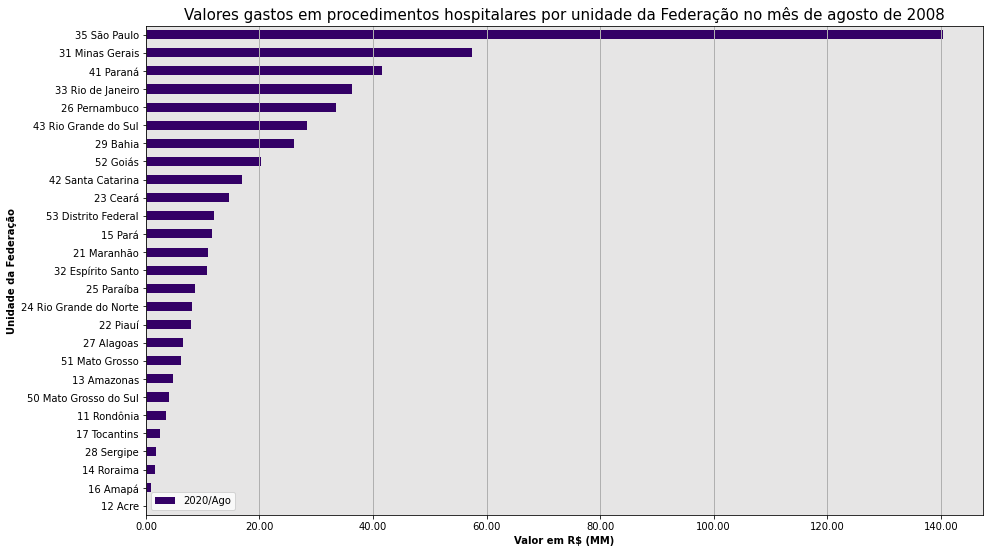

In [16]:

dados_mes_atual = dados[['Unidade da Federação', '2020/Ago']]
dados_mes_atual['2020/Ago'] = dados_mes_atual['2020/Ago'].str.replace('-','0').fillna(0).astype(float)

dados_mes_atual = dados_mes_atual.sort_values(by ='2020/Ago')
dados_mes_atual['2020/Ago'] = dados_mes_atual['2020/Ago']/1000000

ax = dados_mes_atual.plot(x='Unidade da Federação', y='2020/Ago', kind='barh', figsize=(15,9), color = '#330066')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

#adicionando as grids intermediarias
#ax.minorticks_on()
#ax.xaxis.grid(which='minor', linestyle ='--', linewidth=1)
ax.xaxis.grid(which='major', linestyle ='-', linewidth=1)

ax.set_xlabel('Valor em R$ (MM)',color='black', fontweight='bold')
ax.set_ylabel('Unidade da Federação',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#e6e5e5")

plt.title('Valores gastos em procedimentos hospitalares por unidade da Federação no mês de agosto de 2008', {'fontsize': 15, 'color': 'black'})
plt.show()

---
##<font color = #944dff>  **Aula 2**
---

#### <font color = #8533ff> **2.1 - Novo Tratamento**

In [17]:
#fazendo um slicing do dataframe
dados[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [18]:
#aqui fazemos uma amostra das colunas que não possuem dados faltantes.
#tive que retornar ao carregamento dos dados e tirar o na_values = '-', já que ele influencia nessa análise.

#fica de desafio verificar uma forma de validar se não há nenhum valor vazio trazendo na_values = '-'
dados.mean().index

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

In [19]:
#aqui conseguiremos pegar todos os index que possuem todos os números
#o index é imutável, logo transormamos ele em lista para adicionar mais
#um campo.

colunas_usaveis = dados.mean().index.to_list()
#ao executar esse comando, perdenos o unidade da federação

colunas_usaveis.insert(0, 'Unidade da Federação') 
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

In [20]:
#alterando o index para a Unidade da Federação
usaveis = usaveis.set_index('Unidade da Federação')
usaveis.head(1)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72


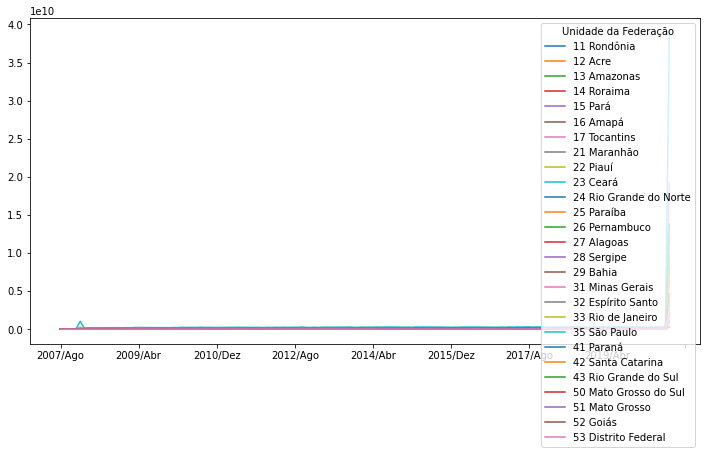

In [21]:
'''
 ao tentar plotar algum gráfico pelos estados, o matplot entende que os estados eram o eixo X
 isso devido ao formato do dataframe, logo usamos o transpor para mudar o eixo de colunas por 
 linhas
'''
usaveis.T.plot(figsize=(12,6))

In [22]:
'''
vemos que ao plotar assim, esquecemos de analisar a última informação que era a coluna Total.
é 
'''
usaveis.drop('Total', axis=1, inplace=True)

### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada**

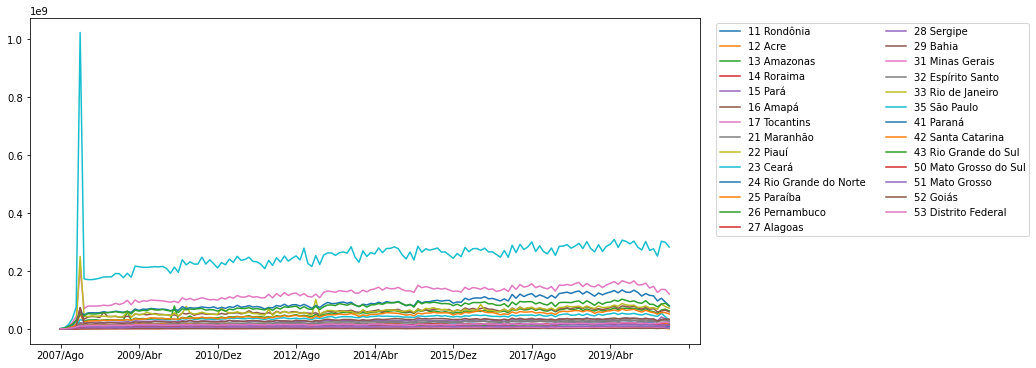

In [23]:
usaveis.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1.5,1), frameon=True, ncol=2, fancybox=True)
plt.show()

#### <font color = #1f004d> **Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência**

In [24]:
'''
Como não tenho preferência, nem quero me enviezar pela minha região de natureza, irei randomizar a escolha
'''
# chamando o random seed para sempre termos a mesma amostragem
np.random.seed(42)
#executo o método sample com 5 colunas,
cinco_estados =  usaveis.T.sample(n=5, axis='columns')
cinco_estados.head(1)

Unidade da Federação,22 Piauí,27 Alagoas,23 Ceará,42 Santa Catarina,11 Rondônia
2007/Ago,220788.25,104243.75,357904.65,693955.05,4209.37


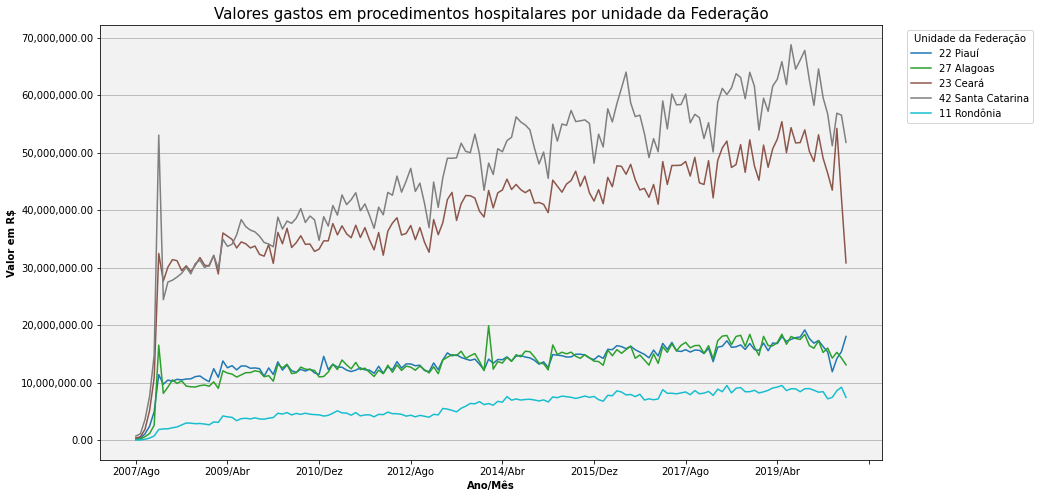

In [25]:
ax = cinco_estados.plot(figsize=(14,8), colormap='tab10')


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))



ax.set_xlabel('Ano/Mês',color='black', fontweight='bold')
ax.set_ylabel('Valor em R$',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")


plt.legend(bbox_to_anchor=(1.2,1), frameon=True, ncol=1, fancybox=True, title='Unidade da Federação')
plt.title('Valores gastos em procedimentos hospitalares por unidade da Federação', {'fontsize': 15, 'color': 'black'})
plt.grid(axis = 'y')
plt.show()

---
##<font color = #944dff>  **Aula 3**
---

#### <font color = #8533ff> **3.1 - Aleatoriedade e mais explorações**

In [26]:
usaveis.T.columns


Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [27]:
# este Index do pandas, possui o formato de acesso igual a um array do numpy ou de uma lista, assim executamos o slicing dos 5 primeiros
usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [28]:
# sem usar o Transpose, podemos acessar pelos index
usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

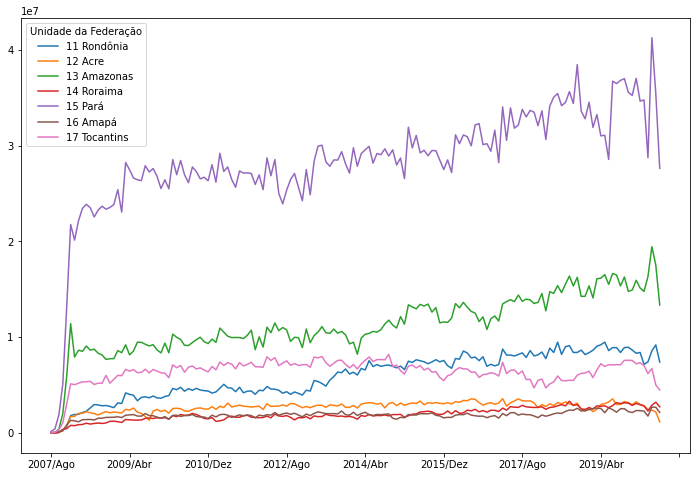

In [29]:
usaveis[:7].T.plot(figsize=(12,8))

#### <font color = #8533ff> **3.2 - Ordenação e série temporal**

In [30]:
#recriando a coluna total, com o ensinamento como se adiciona coluna num dataframe.
usaveis['Total'] = usaveis.sum(axis=1)
usaveis.head(2)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,925572673.82
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420666755.81


In [31]:
# Ao executar o sort_values ele vem por padrão como ordenamento crescente.
ordenado_por_total = usaveis.sort_values(by = 'Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop('Total', axis = 1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.

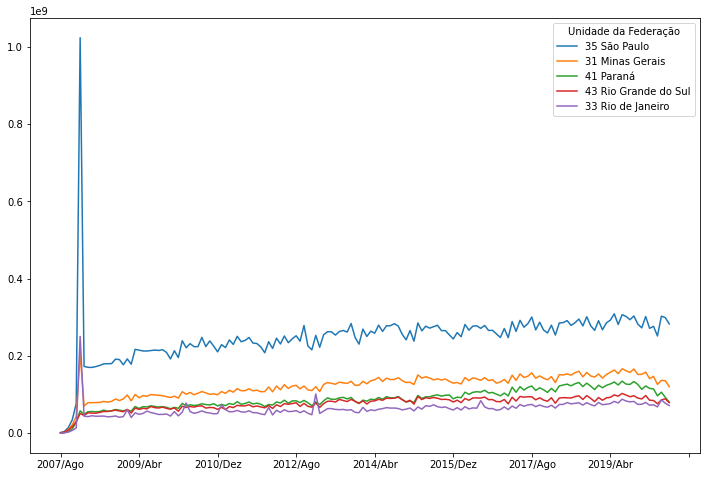

In [32]:
ordenado_por_total[:5].T.plot(figsize=(12,8))

In [33]:
'''
Para fazer o slicing mais simplificado, podemos usar o iloc, que irá buscar pelo index.

Nele, primeiro executamos o slicing das linhas e depois das colunas.


# Na aula foi executado da forma abaixo:
colunas_interessadas = ordenado_por_total.columns[6:] # Aqui criamos uma seleção das colunas pelo index de inicio
ordenado_por_total[colunas_interessadas].head() #aqui aplicamos a selecao no ordenado por total.

'''
ordenado_por_total = ordenado_por_total.iloc[:, 6:]


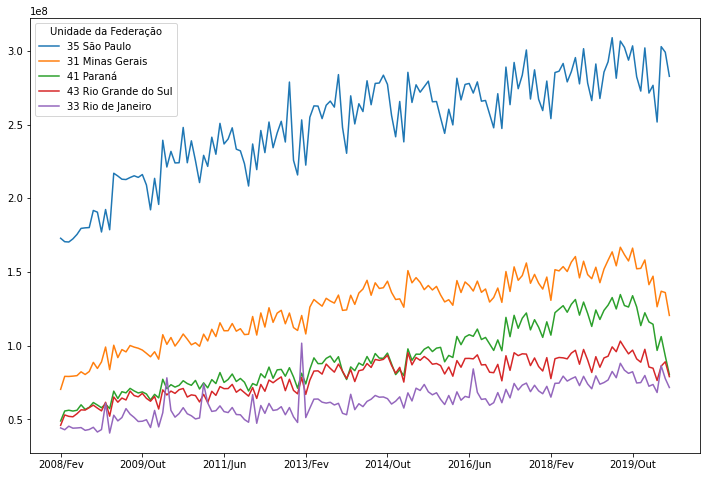

In [34]:
ordenado_por_total[:5].T.plot(figsize=(12,8))

### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.**

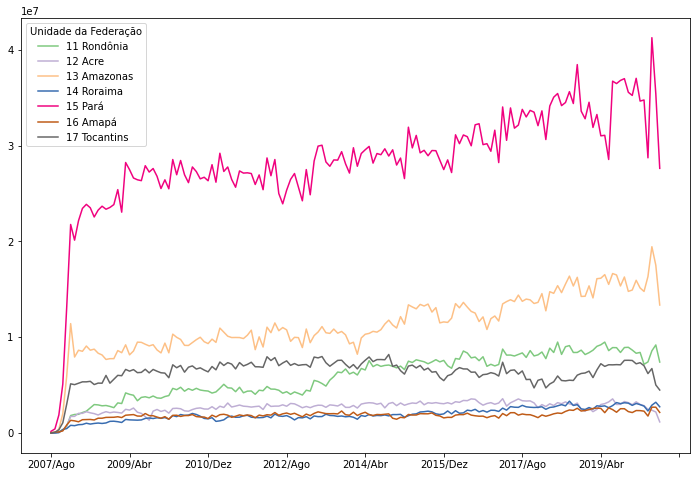

In [35]:
'''
A ideia é executar os desafios conforme ordem das aulas, porém estou executando após terminar cada aula, a fim de 
não perder a linha de raciocínio, então usarei os mesmos dados como se fosse na hora.

Apenas adicionada a nova paleta de cores, tive que executar um slicing nos dados, já que incluimos o valor total no dataset.
'''

usaveis.iloc[:7, :-1].T.plot(figsize=(12,8), colormap='Accent')
plt.show()

#### <font color = #1f004d> **Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.**

In [36]:
'''
Já entendi que eles estão utilizando a codificação do IBGE para a numeração dos estados

Mas a priori não farei inclusão de nova base, apenas criarei um dicionário que represente

Código	Nível	Unidade
1	Brasil	Brasil
1	Grande Região	Norte
2	Grande Região	Nordeste
3	Grande Região	Sudeste
4	Grande Região	Sul
5	Grande Região	Centro-Oeste
'''

regiao = {'1' : 'Norte',
          '2' : 'Nordeste',
          '3' : 'Sudeste',
          '4' : 'Sul',
          '5' : 'Centro-Oeste'
}

'''
Como executarei, criei uma coluna chamada região onde passarei o primeiro número da 
Unidade da Federação que é o indicador da Região.

Para isso, usamos o index.str.get que retorna a string na posição desejada.

Transformo em uma lista para podermos incluir no dataframe
'''
usaveis['Região'] = usaveis.index.str.get(0).to_list()

# Fazendo agora o mapeamento do dicionário na coluna Região
usaveis['Região'] = usaveis['Região'].map(regiao)
usaveis.head(3)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,925572673.82,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420666755.81,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1766925554.09,Norte


In [37]:
usaveis.tail(3)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,9450300.60,9789875.38,8987811.95,8843061.60,9237298.80,9459192.80,9210598.63,10039582.41,9326576.40,11680730.78,11102643.47,11495694.05,11386425.93,11658855.38,12339077.28,11600187.11,11262247.37,11734970.74,11065381.68,11839990.16,10826512.86,13243684.10,12240702.64,12781426.23,11614062.90,12193931.16,12213130.60,11923683.94,11703375.19,11484917.22,...,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,2030739826.14,Centro-Oeste
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,74063828.22,18149374.27,20992213.03,21049477.30,19162546.79,20332533.92,20008563.15,21041071.33,21396098.51,20610541.50,19912347.49,19343787.54,20817880.66,20201261.16,24174119.21,22943952.73,23781906.69,23668981.57,23293723.39,25835544.14,25151192.72,24729933.86,24090130.18,23172590.11,24615752.15,21862807.98,26554387.04,24607122.59,30100615.03,24546627.05,24647099.10,27304926.44,26557595.08,24729254.00,24006963.52,...,33663853.68,33958341.89,36899367.18,32721458.05,35621496.15,32535396.77,32332573.53,33702293.07,30923462.58,34861711.53,33764503.14,36357757.30,33492211.73,35313884.40,35380148.68,33780632.05,35990491.96,34862475.74,34050646.02,34795831.02,33279088.23,34951022.38,36207403.69,37750841.56,35372150.57,36473617.92,38399592.70,36335534.96,37171427.64,36234132.35,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,4637039055.60,Centro-Oeste
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,11969271.76,11299443.00,11548451.89,12422577.60,12419976.84,12302698.99,12005669.60,13150489.00,12358825.51,14445518.57,14434211.04,14622167.93,14209413.80,14459081.79,15051993.46,14045711.83,13162775.24,13197596.70,12889509.22,13484046.67,13295738.66,14928384.44,13535496.11,14394599.86,13863063.00,14051586.56,15073336.93,14636724.40,14052063.36,14277016.84,...,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,2417774340.23,Centro-Oeste


#### <font color = #1f004d> **Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)**

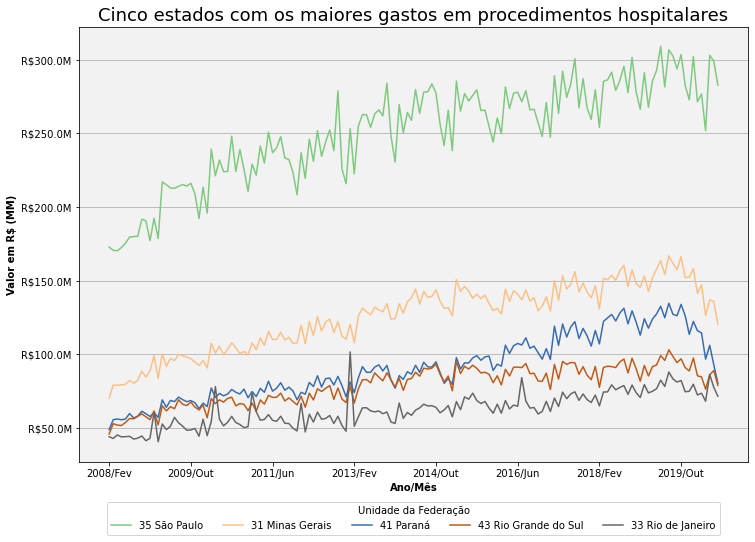

In [38]:
ax = ordenado_por_total[:5].T.plot(figsize=(12,8), colormap='Accent')
def milhoes(x, pos):
    'Os argumentos são o valor e a posição'
    return f'R${(x/1000000)}M'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))


ax.set_xlabel('Ano/Mês',color='black', fontweight='bold')
ax.set_ylabel('Valor em R$ (MM)',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")

#bbox_to_anchor=(1.25,1)
plt.legend(bbox_to_anchor=(0.5,-0.18), loc = 'lower center',frameon=True, ncol=5, fancybox=True, title='Unidade da Federação')
plt.title('Cinco estados com os maiores gastos em procedimentos hospitalares', {'fontsize': 18, 'color': 'black'})
plt.grid(axis = 'y')
plt.show()

#### <font color = #1f004d>  **Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente**

In [39]:
'''
Como meu estado já faz parte dos 5 primeiros, escolherei um aleatório
E irei criar uma variável para guardar os 5 primeiros e adicionar o 6 estado.
'''

np.random.seed(42)
#executo o método sample com 1 linha
novo_estado = ordenado_por_total[5:].sample(n=1, axis='rows')
estados_plotados = ordenado_por_total[:5]
estados_plotados = estados_plotados.append(novo_estado)

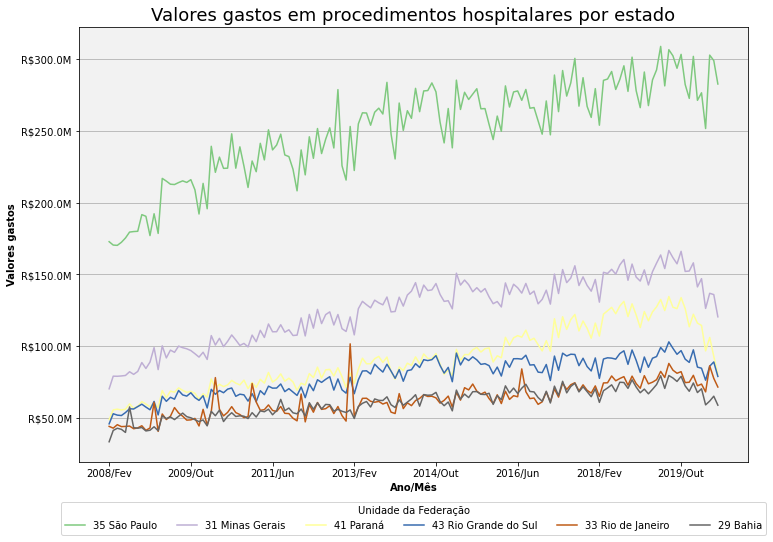

In [40]:
ax = estados_plotados.T.plot(figsize=(12,8), colormap='Accent')



ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))


ax.set_xlabel('Ano/Mês',color='black', fontweight='bold')
ax.set_ylabel('Valores gastos',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")

#bbox_to_anchor=(1.25,1)
plt.legend(bbox_to_anchor=(0.5,-0.18), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Unidade da Federação')
plt.title('Valores gastos em procedimentos hospitalares por estado', {'fontsize': 18, 'color': 'black'})
plt.grid(axis = 'y')
plt.show()

O interessante é que a aleatoriedade trouxe um dos estados que gasta quase exatamente a mesma quantidade que o estado do Rio de Janeiro, podemos futuramente olhar outros parâmetros e verificar se há alguma similariade no IDH ou quantiade de população.

#### <font color = #1f004d> **Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue**

W.I.P

#### <font color = #1f004d> **Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região**

In [41]:
'''
O Proposto é plotar somente o sudeste, então irei selecionar via coluna criada, porém deveremos 
acessar novamente nossos dados usaveis e fazer um novo corte
'''

estados_sudeste = usaveis.query('Região == "Sudeste"') # Fiz uma query apenas no Sudeste
estados_sudeste = estados_sudeste.iloc[:, 6:-2] # Retirei a coluna total e coluna da região e as as datas antes de fevereiro de 2008
estados_sudeste

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
32 Espírito Santo,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,15459495.21,16030031.21,15811419.60,17702137.74,16397384.20,17707422.11,...,24900816.95,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47
33 Rio de Janeiro,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,50891328.43,74005618.29,61109436.88,55320998.84,55806371.23,59071370.86,...,64524506.56,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,17859

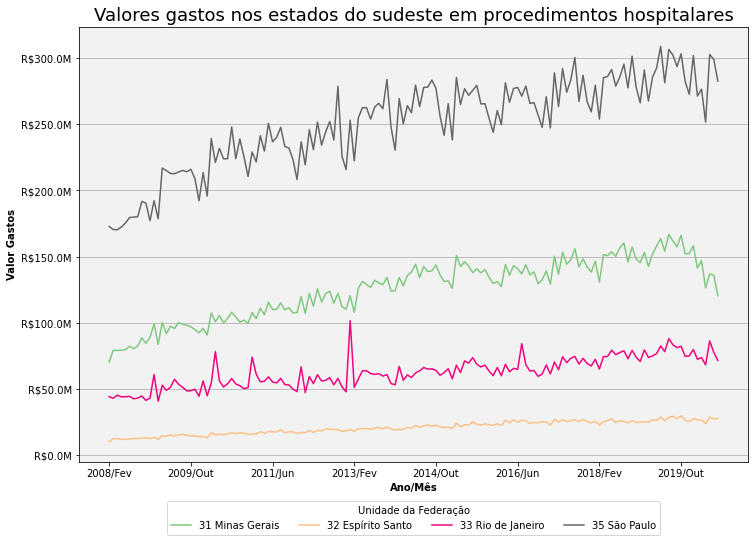

In [42]:
ax = estados_sudeste.T.plot(figsize=(12,8), colormap='Accent')


ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))


ax.set_xlabel('Ano/Mês',color='black', fontweight='bold')
ax.set_ylabel('Valor Gastos',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")

#bbox_to_anchor=(1.25,1)
plt.legend(bbox_to_anchor=(0.5,-0.18), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Unidade da Federação')
plt.grid(axis = 'y')
plt.title('Valores gastos nos estados do sudeste em procedimentos hospitalares', {'fontsize': 18, 'color': 'black'})
plt.show()

Podemos notar que somente o Rio teve o pico atípico, São Paulo teve um pico em um mês anterior ao que parece, porém os dados de São Paulo são muito sasonais.

#### <font color = #1f004d>  **Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.**

In [43]:
estados_sudeste_mais_novo = estados_sudeste.append(novo_estado)

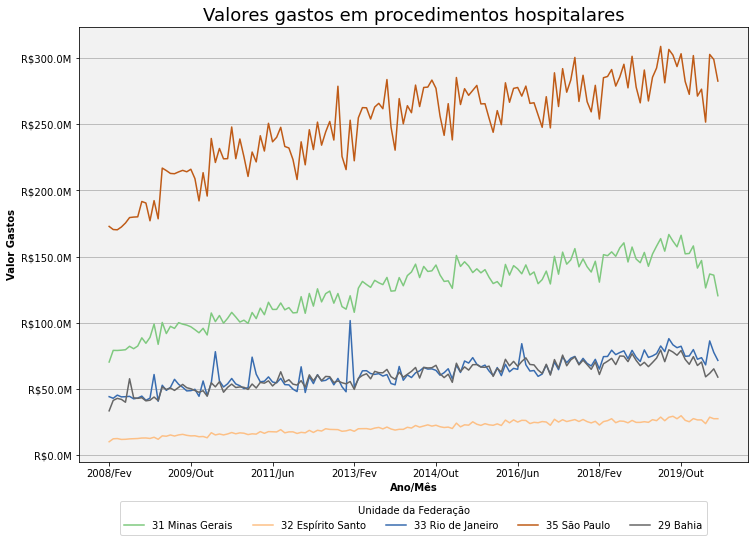

In [44]:
ax = estados_sudeste_mais_novo.T.plot(figsize=(12,8), colormap='Accent')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))


ax.set_xlabel('Ano/Mês',color='black', fontweight='bold')
ax.set_ylabel('Valor Gastos',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")

#bbox_to_anchor=(1.25,1)
plt.legend(bbox_to_anchor=(0.5,-0.18), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Unidade da Federação')
plt.title('Valores gastos em procedimentos hospitalares', {'fontsize': 18, 'color': 'black'})
plt.grid(axis = 'y')
plt.show()

Assim como anteriormente, o estado da Bahia tem os valores muito próximos ao do Rio de Janeiro. O que nos leva a uma investigação mais apurada.

---
##<font color = #944dff>  **Aula 4**
---

#### <font color = #8533ff> **4.1 - Fugindo das más práticas**

In [45]:
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Jul'

In [46]:
gastos_do_mais_recente =  ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           282709570.31
31 Minas Gerais        120467187.34
41 Paraná               80320852.69
43 Rio Grande do Sul    78929703.81
33 Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

In [47]:
gasto_do_mais_recente_comparado_rj = gastos_do_mais_recente / gastos_do_mais_recente.loc['33 Rio de Janeiro']
gasto_do_mais_recente_comparado_rj

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

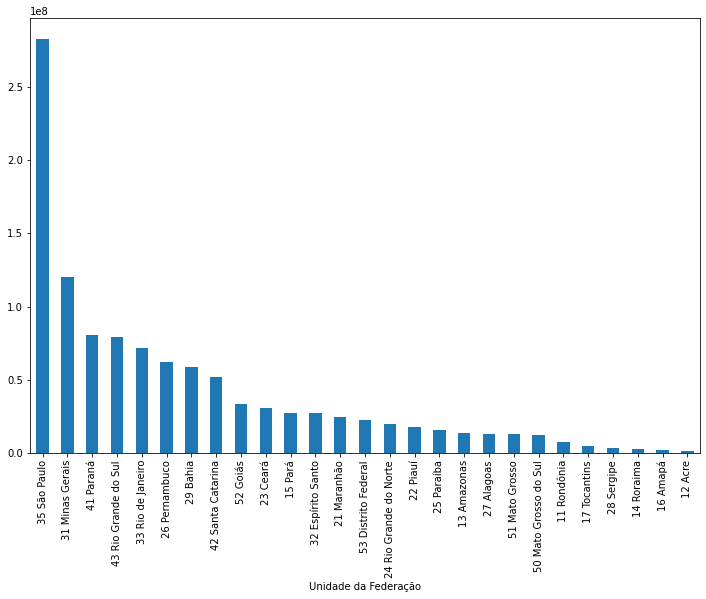

In [48]:
gastos_do_mais_recente =  gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar', figsize = (12,8))
plt.show()

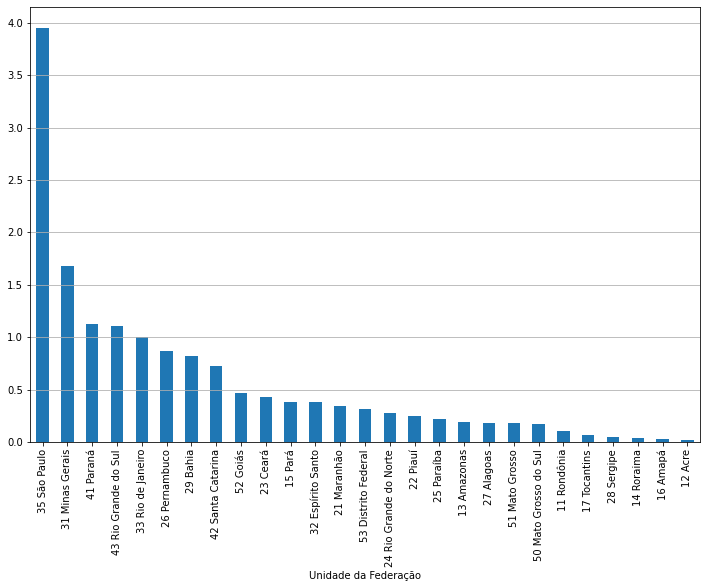

In [49]:
gasto_do_mais_recente_comparado_rj = gasto_do_mais_recente_comparado_rj.sort_values(ascending=False)
gasto_do_mais_recente_comparado_rj.plot(kind='bar', figsize = (12,8))
plt.grid(axis ='y', which='both' )
plt.show()

### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.**

Existem dois métodos de inserir grids nos gráficos do Matplotlib:



*   pyplot.grid: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html
*   axes.Axes.grid: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.axes.Axes.grid.html



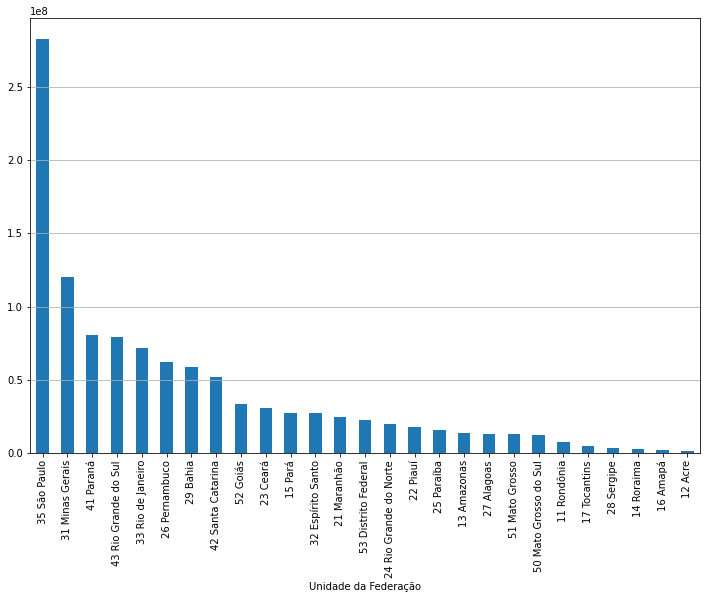

In [50]:
gastos_do_mais_recente =  gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar', figsize = (12,8))
plt.grid(axis ='y', which='both' )
plt.show()

#### <font color = #1f004d> **Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.**

In [51]:
#Tabela

gasto_do_mais_recente_comparado_rj

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
26 Pernambuco            0.87
29 Bahia                 0.82
42 Santa Catarina        0.72
52 Goiás                 0.47
23 Ceará                 0.43
15 Pará                  0.39
32 Espírito Santo        0.38
21 Maranhão              0.34
53 Distrito Federal      0.31
24 Rio Grande do Norte   0.27
22 Piauí                 0.25
25 Paraíba               0.22
13 Amazonas              0.19
27 Alagoas               0.18
51 Mato Grosso           0.18
50 Mato Grosso do Sul    0.17
11 Rondônia              0.10
17 Tocantins             0.06
28 Sergipe               0.05
14 Roraima               0.04
16 Amapá                 0.03
12 Acre                  0.02
Name: 2020/Jul, dtype: float64

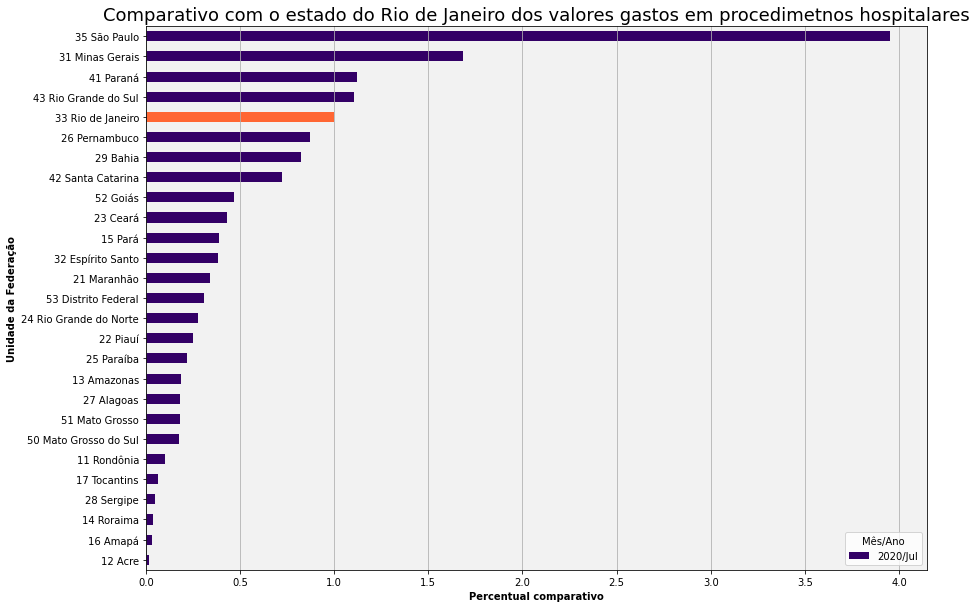

In [52]:
gasto_do_mais_recente_comparado_rj = gasto_do_mais_recente_comparado_rj.sort_values(ascending=True)

cores = ['#330066'if indice != '33 Rio de Janeiro' else  '#ff6633' for  indice, valor in zip(gasto_do_mais_recente_comparado_rj.index,gasto_do_mais_recente_comparado_rj) ]
ax = gasto_do_mais_recente_comparado_rj.plot(kind='barh', figsize = (14,10), color = cores)


ax.set_xlabel('Percentual comparativo',color='black', fontweight='bold')
ax.set_ylabel('Unidade da Federação',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")

plt.legend( loc = 'lower right',frameon=True, ncol=6, fancybox=True, title='Mês/Ano')
plt.title('Comparativo com o estado do Rio de Janeiro dos valores gastos em procedimetnos hospitalares', {'fontsize': 18, 'color': 'black'})
plt.grid(axis = 'x')
plt.show()

#### <font color = #1f004d> **Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.**

Carreguei os dados de população e fiz os tratamentos dos dados exportados diretamente no pandas

In [53]:
dados_populacao = pd.read_csv(arquivo_estudo_1, skiprows=3, sep=';',
                              skipfooter =88, engine='python',
                              thousands='.', decimal =',')

In [54]:
dados_populacao = dados_populacao.set_index('Cód.')
dados_populacao.head()

,"Brasil, Grande Região e UF",2019,2020
Cód.,,,
1,Brasil,210147125,211755692
1,Norte,18430980,18672591
11,Rondônia,1777225,1796460
12,Acre,881935,894470
13,Amazonas,4144597,4207714


Como temos os estados abertos e na base da aula podemos pegar os códigos dos estados via string, irei criar uma coluna para separar o código e buscar o que queremos.


Eu irei fazer um comparativo dos gastos de 2019 com a população estimada de 2019, já que os gastos de 2020 ainda estão muito baixos se comparados aos outro anos.

In [55]:
#selecionando apenas as que possuem 2019
ordenado_por_total_2019 = ordenado_por_total.loc[:, ordenado_por_total.columns.str.startswith('2019')] 
#Criando um dataframe com o somatório dos gastos em 2019
ordenado_por_total_2019 = pd.DataFrame(ordenado_por_total_2019.sum(axis=1), index=ordenado_por_total_2019.sum(axis=1).index, columns={'Valor Total 2019'})
#Criado o campo de código no dataframe
ordenado_por_total_2019['Cód.'] = ordenado_por_total_2019.index.str.slice(0,2).astype(int)
#Crio a coluna com código do IBGE de cada Unidade da Federação e irei executar o merge com essa coluna
#Já realizando algumas mudanças
valores_totais_2019 = pd.merge(ordenado_por_total_2019, dados_populacao, how='inner',on='Cód.').rename(columns = {'Cód.': 'Código IBGE', '2019' : 'População Estimada 2019', 'Brasil, Grande Região e UF': 'Estado'}).set_index('Estado').drop('2020', axis=1)

In [56]:
valores_totais_2019['Valor Por Habitante 2019'] = valores_totais_2019['Valor Total 2019'] / valores_totais_2019['População Estimada 2019']
valores_totais_2019.head()

,Valor Total 2019,Código IBGE,População Estimada 2019,Valor Por Habitante 2019
Estado,,,,
São Paulo,3488394774.56,35,45919049,75.97
Minas Gerais,1879921242.64,31,21168791,88.81
Paraná,1512234731.07,41,11433957,132.26
Rio Grande do Sul,1129688622.89,43,11377239,99.29
Rio de Janeiro,949687988.75,33,17264943,55.01


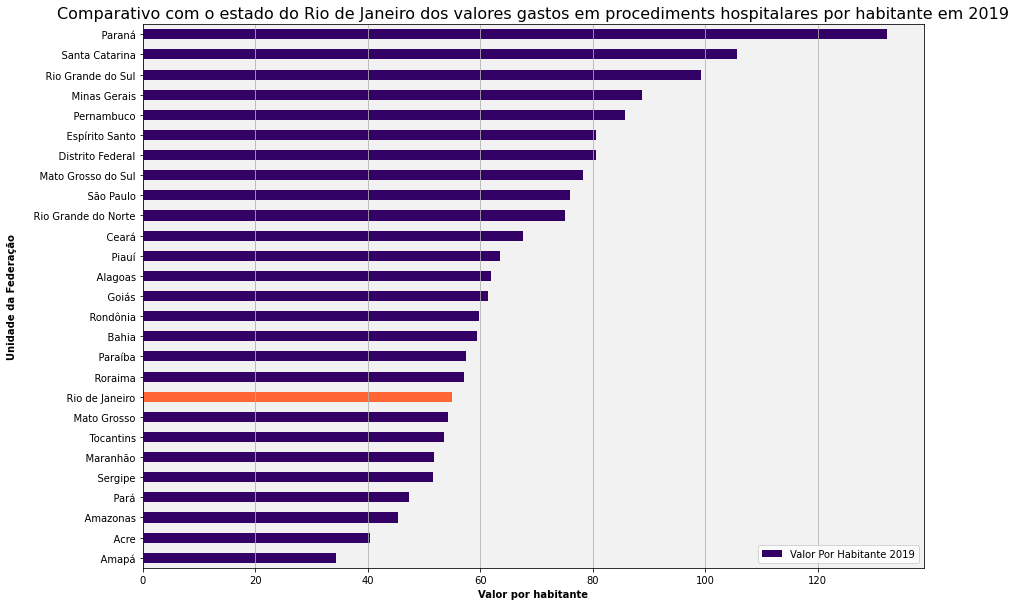

In [57]:
valores_totais_2019 = valores_totais_2019.sort_values(by= 'Valor Por Habitante 2019', ascending=True)

cores = ['#330066'if indice != '    Rio de Janeiro' else  '#ff6633' for  indice, valor in zip(valores_totais_2019.index,valores_totais_2019['Valor Por Habitante 2019']) ]
ax = valores_totais_2019['Valor Por Habitante 2019'].plot(kind='barh', figsize = (14,10), color = cores)


ax.set_xlabel('Valor por habitante',color='black', fontweight='bold')
ax.set_ylabel('Unidade da Federação',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")

plt.legend( loc = 'lower right',frameon=True, ncol=6, fancybox=True)
plt.title('Comparativo com o estado do Rio de Janeiro dos valores gastos em procediments hospitalares por habitante em 2019', {'fontsize': 16, 'color': 'black'})
plt.grid(axis = 'x')
plt.show()

Super interessante esta verificação. Podemos lembrar que o Rio era o quinta com maior gasto em procedimentos hospitalares, porém se verificarmos apenas aquela informação pensamos que a saúde é uma maravilha.

Porém se avaliarmos o total da população em 2019 e o gasto por habitante estimado, temos que o Rio está bem longe de ser o que mais investe na saúde.

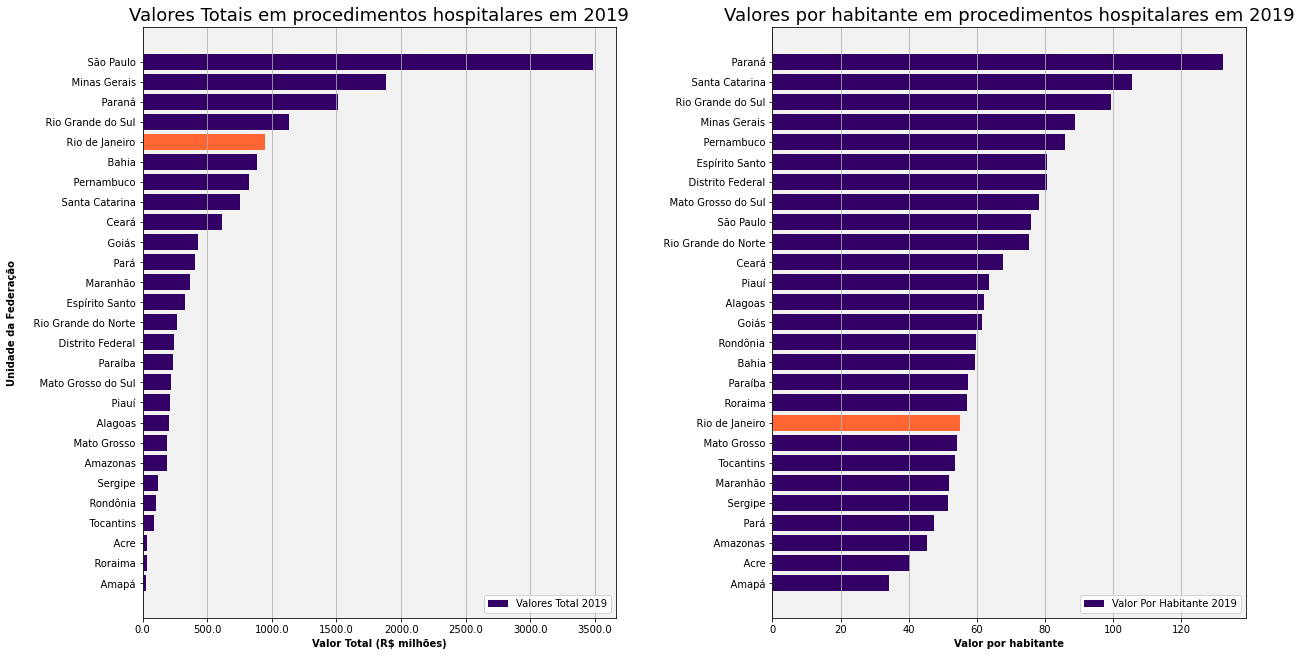

In [58]:
#@title Código do plot
#iniciando a figura
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(18,9), constrained_layout=True)

#primeiro gráfico - Valores totais
valores_totais_2019 = valores_totais_2019.sort_values(by ='Valor Total 2019',ascending=True)

#cores para o Rio de Janeiro
cores_total = ['#330066'if indice != '    Rio de Janeiro' else  '#ff6633' for  indice, valor in zip(valores_totais_2019.index,valores_totais_2019['Valor Total 2019']) ]

#barras horizontais
axs[0].barh(valores_totais_2019.index, valores_totais_2019['Valor Total 2019'], color = cores_total, label='Valores Total 2019' )

#os labels 'x' e 'y'
axs[0].set_xlabel('Valor Total (R$ milhões)',color='black', fontweight='bold')
axs[0].set_ylabel('Unidade da Federação',color='black', fontweight='bold')

#formatação do eixo x
def milhoes_segunda_forma(x, pos):
    'Os argumentos são o valor e a posição'
    return f'{(x/1000000)}'

axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(milhoes_segunda_forma))

#cor dos eixos
axs[0].tick_params(axis='x', colors='black')
axs[0].tick_params(axis='y', colors='black')
axs[0].grid(axis='x')

#cor do fundo
axs[0].set_facecolor("#f2f2f2")

#legenda
axs[0].legend(loc = 'lower right',frameon=True,  fancybox=True)
axs[0].set_title('Valores Totais em procedimentos hospitalares em 2019', {'fontsize': 18, 'color': 'black'})

#segundo gráfico - Valores por habitantes
valores_totais_2019 = valores_totais_2019.sort_values(by ='Valor Por Habitante 2019',ascending=True)

#cores para o Rio de Janeiro
cores_hab = ['#330066'if indice != '    Rio de Janeiro' else  '#ff6633' for  indice, valor in zip(valores_totais_2019.index,valores_totais_2019['Valor Por Habitante 2019']) ]

#barras horizontais
axs[1].barh(valores_totais_2019.index, valores_totais_2019['Valor Por Habitante 2019'], color = cores_hab,  label='Valor Por Habitante 2019' )

#os labels 'x' e 'y'
axs[1].set_xlabel('Valor por habitante',color='black', fontweight='bold')


#cor dos eixos
axs[1].tick_params(axis='x', colors='black')
axs[1].tick_params(axis='y', colors='black')
axs[1].grid(axis='x')

#cor do fundo
axs[1].set_facecolor("#f2f2f2")

#legenda
axs[1].legend(loc = 'lower right',frameon=True,  fancybox=True)
axs[1].set_title('Valores por habitante em procedimentos hospitalares em 2019', {'fontsize': 18, 'color': 'black'})

plt.show()

Neste caso agora com os dois gráficos lado a lado, podemos realmente perceber que apesar do Rio de Janeiro ser um dos top 5 que mais gastam com procedimentos hospitalares, eles estão muito longe de ser os que mais investem por habitante. 

Ou seja, para que houvesse um nível de saúde comparável ao do Paraná, o Rio deveria investir pelo menos o dobro do que investe atualmente.

Isso também não significa que a saúde onde se mais investe é a melhor possível, para termos estas informações devemos nos munir de mais dados, como IDH, índices de morbidade e índices de nascimento.


Outro ponto, que havíamos por aleatoriedade incluído a Bahia com os 5 maiores que investem, tendo ela sido a 6 a investir a mais no ano de 2019 também. Ela apesar de investir quase o mesmo montante do que o Rio de Janeiro, proporcionalmente à sua população ela investe mais que o Rio de Janeiro.

##### <font color = #1f004d> **Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.**

Irei fazer o mesmo mapeamento de dados que fiz anteriormente, agora para a região. Lembrando que estou usando um slicing do nosso dataframe inicial e retirei diversas informações.

Como já sabemos criar com o map e temos o dataset do IBGE, iremos apenas fixar o aprendizado do merge.

Após esse tratamento iremos verificar quais regiões investiram mais e proporcionalmente a população foi investido.

In [59]:
valores_totais_2019['Cód.'] = valores_totais_2019['Código IBGE'].astype(str).str.get(0).astype(int)
valores_totais_2019.reset_index(inplace=True) #para não perder a coluna de Estado, devemos resetar o index antes do merge
valores_totais_2019 = pd.merge(valores_totais_2019,dados_populacao[dados_populacao['Brasil, Grande Região e UF'] != 'Brasil'], how='left', on='Cód.')
valores_totais_2019.drop(['2019', '2020'], axis=1, inplace=True)
valores_totais_2019.rename(columns={'Brasil, Grande Região e UF' : 'Região', 'Cód': 'Código IBGE Região'}, inplace=True)
valores_totais_2019.set_index('Estado', inplace=True)
valores_totais_2019.head()

,Valor Total 2019,Código IBGE,População Estimada 2019,Valor Por Habitante 2019,Cód.,Região
Estado,,,,,,
Amapá,29025429.19,16,845731,34.32,1,Norte
Acre,35575765.00,12,881935,40.34,1,Norte
Amazonas,188226825.98,13,4144597,45.41,1,Norte
Pará,407971524.00,15,8602865,47.42,1,Norte
Sergipe,118502754.59,28,2298696,51.55,2,Nordeste


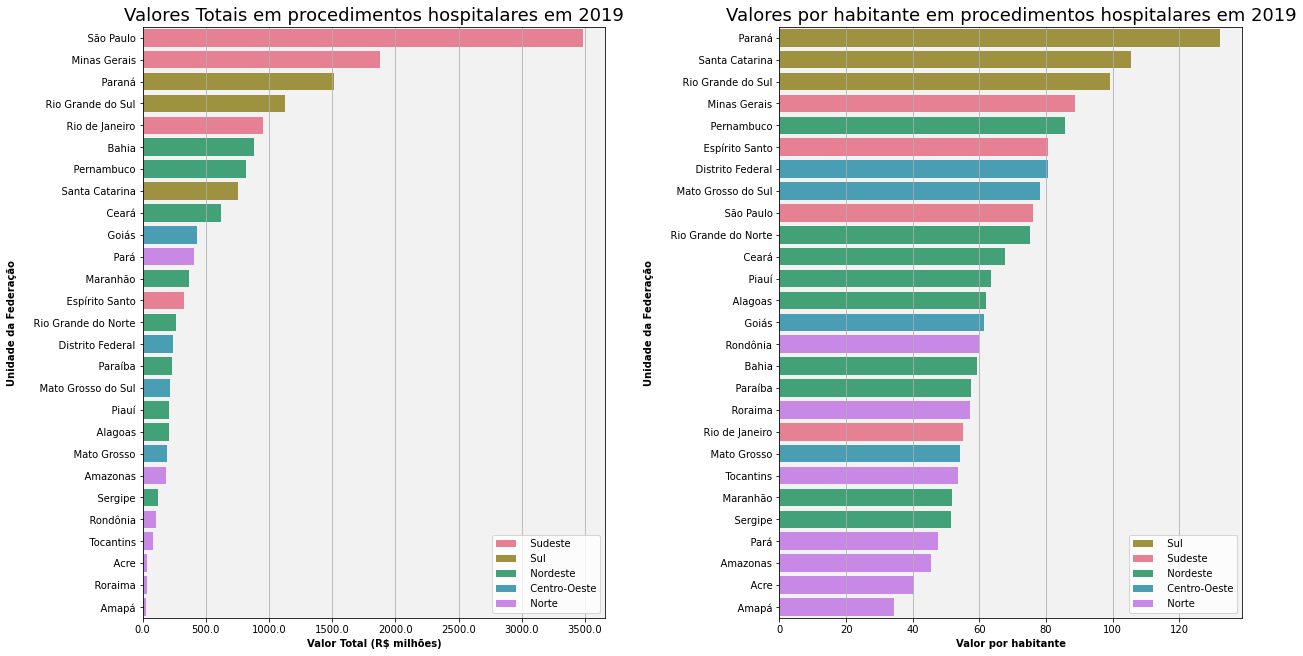

In [60]:
#@title Código do plot

#iniciando a figura
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(18,9), constrained_layout=True)

#primeiro gráfico - Valores totais
valores_totais_2019 = valores_totais_2019.sort_values(by ='Valor Total 2019',ascending=False)

#paleta de cores
paleta = dict(zip(valores_totais_2019['Região'].unique(), sns.color_palette("husl", 5)))

#barras horizontais
sns.barplot(ax=axs[0],x='Valor Total 2019' , y=valores_totais_2019.index, data=valores_totais_2019, hue='Região', dodge=False, palette=paleta)


#os labels 'x' e 'y'
axs[0].set_xlabel('Valor Total (R$ milhões)',color='black', fontweight='bold')
axs[0].set_ylabel('Unidade da Federação',color='black', fontweight='bold')

#formatação do eixo x
def milhoes_segunda_forma(x, pos):
    'Os argumentos são o valor e a posição'
    return f'{(x/1000000)}'

axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(milhoes_segunda_forma))

#cor dos eixos
axs[0].tick_params(axis='x', colors='black')
axs[0].tick_params(axis='y', colors='black')
axs[0].grid(axis='x')

#cor do fundo
axs[0].set_facecolor("#f2f2f2")

#legenda
axs[0].legend(loc = 'lower right',frameon=True,  fancybox=True)
axs[0].set_title('Valores Totais em procedimentos hospitalares em 2019', {'fontsize': 18, 'color': 'black'})

#segundo gráfico - Valores por habitantes
valores_totais_2019 = valores_totais_2019.sort_values(by ='Valor Por Habitante 2019',ascending=False)


#barras horizontais
sns.barplot(ax=axs[1],x='Valor Por Habitante 2019' , y=valores_totais_2019.index, data=valores_totais_2019, hue='Região', dodge=False, palette=paleta)


#os labels 'x' e 'y'
axs[1].set_xlabel('Valor por habitante',color='black', fontweight='bold')
axs[1].set_ylabel('Unidade da Federação',color='black', fontweight='bold')


#cor dos eixos
axs[1].tick_params(axis='x', colors='black')
axs[1].tick_params(axis='y', colors='black')
axs[1].grid(axis='x')

#cor do fundo
axs[1].set_facecolor("#f2f2f2")

#legenda
axs[1].legend(loc = 'lower right',frameon=True,  fancybox=True)
axs[1].set_title('Valores por habitante em procedimentos hospitalares em 2019', {'fontsize': 18, 'color': 'black'})

plt.show()

O Sudeste tem os estados que mais gastam em procedimentos, apesar desse número não ser refletido quando estamos comparando pela população. Tendo a região Sul a região que mais investe proporcionalmente a sua população.

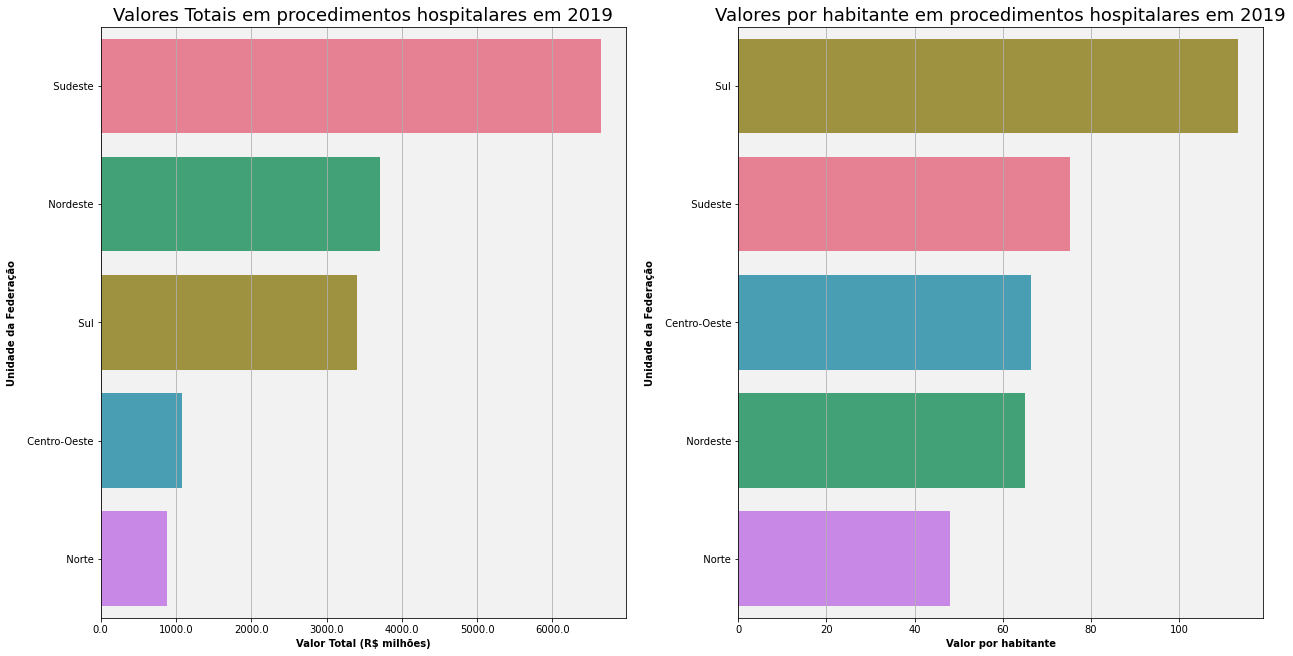

In [61]:
#@title Código do plot
#Criando um dataframe apenas com a soma
valores_totais_2019_regiao = valores_totais_2019.groupby(by=['Região']).sum()
valores_totais_2019_regiao['Valor Por Habitante 2019'] = valores_totais_2019_regiao['Valor Total 2019'] / valores_totais_2019_regiao['População Estimada 2019']

#iniciando a figura
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(18,9), constrained_layout=True)

#primeiro gráfico - Valores totais
ordem_1 = valores_totais_2019_regiao.sort_values(by ='Valor Total 2019',ascending=False).index


#barras horizontais
sns.barplot(ax=axs[0],x='Valor Total 2019' , y=valores_totais_2019_regiao.index, data=valores_totais_2019_regiao, palette=paleta, order=ordem_1)


#os labels 'x' e 'y'
axs[0].set_xlabel('Valor Total (R$ milhões)',color='black', fontweight='bold')
axs[0].set_ylabel('Unidade da Federação',color='black', fontweight='bold')

#formatação do eixo x
def milhoes_segunda_forma(x, pos):
    'Os argumentos são o valor e a posição'
    return f'{(x/1000000)}'

axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(milhoes_segunda_forma))

#cor dos eixos
axs[0].tick_params(axis='x', colors='black')
axs[0].tick_params(axis='y', colors='black')
axs[0].grid(axis='x')

#cor do fundo
axs[0].set_facecolor("#f2f2f2")

#legenda
#axs[0].legend(loc = 'lower right',frameon=True,  fancybox=True)
axs[0].set_title('Valores Totais em procedimentos hospitalares em 2019', {'fontsize': 18, 'color': 'black'})

#segundo gráfico - Valores por habitantes
ordem_2 = valores_totais_2019_regiao.sort_values(by ='Valor Por Habitante 2019',ascending=False).index


#barras horizontais
sns.barplot(ax=axs[1],x='Valor Por Habitante 2019' , y=valores_totais_2019_regiao.index, data=valores_totais_2019_regiao, palette=paleta, order=ordem_2)


#os labels 'x' e 'y'
axs[1].set_xlabel('Valor por habitante',color='black', fontweight='bold')
axs[1].set_ylabel('Unidade da Federação',color='black', fontweight='bold')


#cor dos eixos
axs[1].tick_params(axis='x', colors='black')
axs[1].tick_params(axis='y', colors='black')
axs[1].grid(axis='x')

#cor do fundo
axs[1].set_facecolor("#f2f2f2")

#legenda
#axs[1].legend(loc = 'lower right',frameon=True,  fancybox=True)
axs[1].set_title('Valores por habitante em procedimentos hospitalares em 2019', {'fontsize': 18, 'color': 'black'})

plt.show()

Como podemos analisar aqui, temos realmente o custo de 2019 maior na região Sudeste e a região Sul sendo a terceira que mais gastou em 2019. Porém ao analisar os valores por habitantes, temos uma inversão, a região Sul se torna a que mais gasta proporcionalmente a quantidade de habitantes.

A Região Nordeste apesar de ser a segunda em valor, proporcionalmente a sua poulação ela é a quarta região do país, gastando um pouco mais de 60 reais por habitante.

#### <font color = #1f004d> **Desafio 05: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.**

#### <font color = #1f004d> **Super Desafio: Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.**